In [241]:
import pandas  as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [242]:
df = pd.read_csv("http://www.stat.ufl.edu/~winner/data/airq402.dat" ,delimiter="\s+")
df.columns = ['City1' , 'City2' , 'Average Fare' , 'Distance' , 'Average weekly passengers' , 'market leading airline','market share', 'Average fare' , 'Low price airline' , 'market share' , 'price']
df.head(5)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69


In [243]:
df.describe().transpose()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
City1                        999 non-null object
City2                        999 non-null object
Average Fare                 999 non-null float64
Distance                     999 non-null int64
Average weekly passengers    999 non-null float64
market leading airline       999 non-null object
market share                 999 non-null float64
Average fare                 999 non-null float64
Low price airline            999 non-null object
market share                 999 non-null float64
price                        999 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 85.9+ KB


In [244]:
#Removing outliers
#type(df['City1'])
#df1 = df.select_dtypes(exclude=['object'])
#df1
z = np.abs(stats.zscore(df.select_dtypes(exclude=['object'])))
z

array([[0.73999901, 0.3071649 , 0.51623989, ..., 0.69630323, 0.63847681,
        0.51432033],
       [0.92143301, 0.31960686, 0.59592894, ..., 0.91444717, 1.1725783 ,
        0.50604872],
       [1.69891361, 1.19676538, 0.0856998 , ..., 1.56210752, 2.30683806,
        1.5749281 ],
       ...,
       [0.06241662, 0.37870619, 0.22345408, ..., 0.11260777, 0.76184465,
        0.33450474],
       [1.62356645, 1.37406338, 0.59763806, ..., 1.48898593, 2.40915211,
        1.47793163],
       [0.66410978, 0.30872014, 0.25685905, ..., 0.58725947, 0.14974766,
        0.45078552]])

In [245]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Average Fare                  71.410
Distance                     901.000
Average weekly passengers    513.150
market share                  27.010
Average fare                  78.985
market share                  39.760
price                         54.715
dtype: float64


In [246]:
df1 = df[(z < 3).all(axis=1)]
print(df1.shape)
df1

(965, 11)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


In [247]:
target_column = df1['Average Fare']

In [248]:
df2 = df1.corr()
df2 = df2[df2['Average Fare'] > 0.1]
df2

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share,price
Average Fare,1.000000,0.551675,-0.222545,-0.227790,0.981087,-0.475423,0.859290
Distance,0.551675,1.000000,-0.164988,-0.533157,0.525710,-0.364493,0.557433
Average fare,0.981087,0.525710,-0.191247,-0.214001,1.000000,-0.499035,0.817193
price,0.859290,0.557433,-0.254508,-0.314345,0.817193,-0.248961,1.000000


In [249]:
df3 = df1.drop(labels=['City1' , 'City2' , 'Average Fare' , 'Average weekly passengers' , 'market leading airline','market share', 'Low price airline' , 'market share' ], axis=1)

In [250]:
df3

,Distance,Average fare,price
0,860,123.09,118.94
1,852,223.98,167.12
2,288,68.86,68.86
3,723,161.36,145.42
4,1204,137.97,127.69
5,2237,148.59,148.59
6,2467,205.06,174.00
7,1073,127.69,127.69
8,1130,132.91,124.78
9,1269,226.79,200.93


AxesSubplot(0.125,0.125;0.775x0.755)


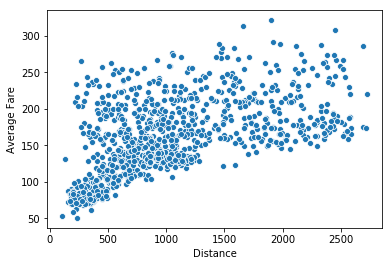

In [251]:
print(sns.scatterplot(x=df3['Distance'] , y=target_column))

AxesSubplot(0.125,0.125;0.775x0.755)


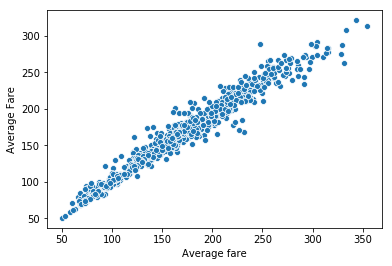

In [252]:
print(sns.scatterplot(x=df3['Average fare'] , y=target_column))

AxesSubplot(0.125,0.125;0.775x0.755)


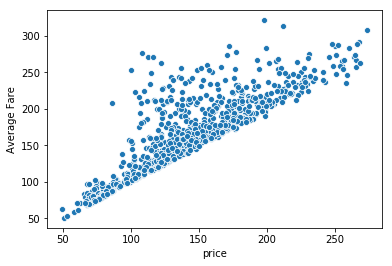

In [253]:
print(sns.scatterplot(x=df3['price'] , y=target_column))

In [254]:
X_train, X_test, y_train, y_test = train_test_split(df3, target_column, test_size=0.20, random_state=42)

In [255]:
X_test

,Distance,Average fare,price
920,935,161.14,139.41
483,238,205.59,163.60
170,866,209.70,209.70
420,248,81.97,81.97
71,1587,255.09,225.74
141,936,261.90,136.87
480,1979,202.09,140.92
471,1149,151.71,125.48
90,547,168.36,117.23
314,607,178.39,178.39


In [256]:
regression_model = LinearRegression()

In [257]:
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [258]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Distance is 0.0013896364703286528
The coefficient for Average fare is 0.7615101952111216
The coefficient for price is 0.1915743691496365


In [259]:
regression_model.score(X_test, y_test)

0.964677119038003

In [260]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [261]:
import math
math.sqrt(mse)

9.136124729653051

In [262]:
y_pred = regression_model.predict(X_test)

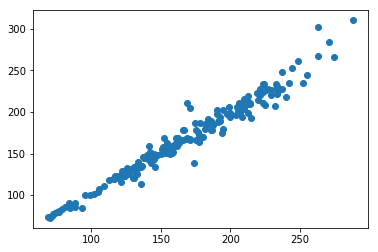

In [263]:
plt.scatter(y_test, y_pred)